# (1) Data Load

In [392]:
import pandas as pd
import numpy as np

data=pd.read_csv(r"C:\Users\USER\Desktop\건우\fat_predict_project\data\public_health_data_csv\profiling용.csv")

-     '5.feature_filterling.ipynb' 에서 만든 특성 list import

In [393]:
import pickle

# 순서 적용해서 분류한 특성 리스트
with open('total_list.pkl', 'rb') as f:
    total_list = pickle.load(f)

for i in total_list:
    print(i)

continuous_columns
['N_WATER', 'N_FAT', 'age', 'HE_ht', 'N_INTK', 'HE_wt', 'N_EN', 'N_CHO', 'HE_wc', 'DW_WBT_pFT', 'BP8', 'DW_WBT_BMD', 'N_PROT']
category_columns
['BO1_1', 'BO1_3', 'sex', 'BO3_07', 'fat', 'DI1_2', 'BO3_09', 'BO3_12', 'DI1_dg', 'EC1_1', 'BO3_05', 'BO2_1', 'BO3_04', 'BO3_02', 'N_DIET', 'BO3_03', 'BO3_01']


In [394]:
continuous_columns= total_list[1]
category_columns=total_list[3]

(2) Modeling

-     1. 카테고리형 변수 원핫 인코딩

In [395]:
# category_columns에서 타겟변수인 'fat'은 제외하고 원핫인코딩 리스트 ㅐㅅㅇ성
one_hot_list=category_columns
one_hot_list.remove('fat')
for i in one_hot_list:
    data[i] = data[i].astype(str)

In [396]:
data[one_hot_list].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4131 entries, 0 to 4130
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   BO1_1   4131 non-null   object
 1   BO1_3   4131 non-null   object
 2   sex     4131 non-null   object
 3   BO3_07  4131 non-null   object
 4   DI1_2   4131 non-null   object
 5   BO3_09  4131 non-null   object
 6   BO3_12  4131 non-null   object
 7   DI1_dg  4131 non-null   object
 8   EC1_1   4131 non-null   object
 9   BO3_05  4131 non-null   object
 10  BO2_1   4131 non-null   object
 11  BO3_04  4131 non-null   object
 12  BO3_02  4131 non-null   object
 13  N_DIET  4131 non-null   object
 14  BO3_03  4131 non-null   object
 15  BO3_01  4131 non-null   object
dtypes: object(16)
memory usage: 516.5+ KB


In [397]:
# 원핫인코딩 적용한 데이터 프레임
encoded_data=pd.get_dummies(data[one_hot_list])

-     2. 연속형 변수 min_max_scaling 

In [398]:
from sklearn.preprocessing import MinMaxScaler

# Min-Max Scaler 객체 생성
scaler = MinMaxScaler()


# 선택한 컬럼들에 Min-Max Scaling 적용
data[continuous_columns] = scaler.fit_transform(data[continuous_columns])

In [399]:
# 원핫인코딩한 데이터프레임, 연속형특성 데이터프레임, 타겟변수 데이터프레임 병합
data=pd.concat((encoded_data, data[continuous_columns], data['fat']), axis=1)

-     3. 모델링 

In [400]:
y = data['fat']
X = data.drop(['fat', 'DW_WBT_pFT','DW_WBT_BMD'], axis=1)

In [401]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y, random_state=42)

In [402]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report

# 모델 객체
rf_classifier = RandomForestClassifier()

# 모델 훈련
rf_classifier.fit(X_train, y_train)

# 예측값
y_pred = rf_classifier.predict(X_test)

# 정확도
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# f1 스코어
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 스코어:", f1)

report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.532258064516129
F1 스코어: 0.5280803294265959
              precision    recall  f1-score   support

           0       0.63      0.65      0.64       413
           1       0.40      0.35      0.38       413
           2       0.55      0.59      0.57       414

    accuracy                           0.53      1240
   macro avg       0.53      0.53      0.53      1240
weighted avg       0.53      0.53      0.53      1240



In [403]:
import matplotlib.pyplot as plt
def feature_importance(model, X_train, top_n=30):
    #model.fit(X_train, y_train)
    importance=model.feature_importances_
    feature_names = X_train.columns
    # feature importance를 기준으로 내림차순 정렬
    sorted_idx = importance.argsort()[::-1]
    sorted_names = [feature_names[i] for i in sorted_idx]
    sorted_importance = importance[sorted_idx]

    # 상위 top_n개만 선택
    sorted_names = sorted_names[:top_n]
    sorted_importance = sorted_importance[:top_n]
    
    #특성이름 출력
    print(sorted_names)
   
    # 바 차트로 시각화
    plt.figure(figsize=(5, 5))
    plt.barh(sorted_names, sorted_importance)
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title('Feature Importance')
    plt.show()

['HE_wc', 'HE_wt', 'HE_ht', 'N_FAT', 'age', 'N_PROT', 'N_CHO', 'N_EN', 'N_INTK', 'N_WATER', 'BP8', 'EC1_1_1.0', 'N_DIET_2.0', 'EC1_1_2.0', 'N_DIET_1.0', 'BO1_1_2.0', 'BO1_1_1.0', 'BO2_1_1.0', 'sex_2', 'sex_1', 'BO1_1_3.0', 'BO1_3_8.0', 'BO3_03_1.0', 'BO3_03_0.0', 'DI1_dg_8.0', 'BO3_01_0.0', 'BO3_01_1.0', 'BO2_1_2.0', 'DI1_2_8.0', 'BO1_3_1.0']


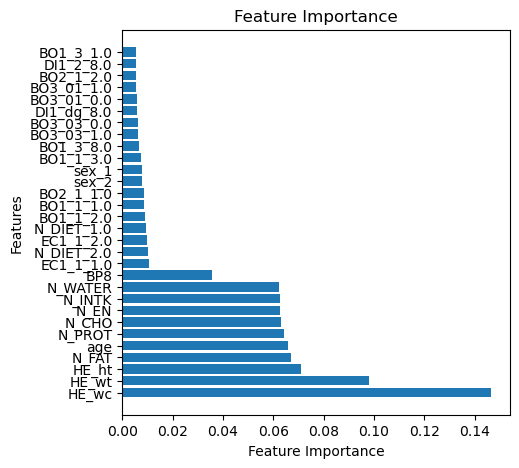

In [404]:
feature_importance(rf_classifier, X_train, 30)

-------
번외로 딥러닝까지 진행함

In [405]:
from keras.utils import np_utils
y_encoded=np_utils.to_categorical(y)
print(y_encoded)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [406]:
from keras.models import Sequential
from keras.layers import Dense
model=Sequential()
model.add(Dense(16, input_dim=len(X.columns), activation='relu'))
model.add(Dense(3, activation='softmax'))

In [407]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [408]:
model.fit(X, y_encoded, epochs=50, batch_size=1)

Epoch 1/50


4131/4131 [==============================] - 3s 660us/step - loss: 1.0415 - accuracy: 0.4529
Epoch 2/50
4131/4131 [==============================] - 3s 680us/step - loss: 0.9730 - accuracy: 0.4965
Epoch 3/50
4131/4131 [==============================] - 3s 778us/step - loss: 0.9488 - accuracy: 0.5238
Epoch 4/50
4131/4131 [==============================] - 3s 775us/step - loss: 0.9360 - accuracy: 0.5364
Epoch 5/50
4131/4131 [==============================] - 3s 642us/step - loss: 0.9277 - accuracy: 0.5369
Epoch 6/50
4131/4131 [==============================] - 3s 672us/step - loss: 0.9210 - accuracy: 0.5418
Epoch 7/50
4131/4131 [==============================] - 3s 654us/step - loss: 0.9193 - accuracy: 0.5502
Epoch 8/50
4131/4131 [==============================] - 3s 728us/step - loss: 0.9159 - accuracy: 0.5461
Epoch 9/50
4131/4131 [==============================] - 3s 829us/step - loss: 0.9117 - accuracy: 0.5551
Epoch 10/50
4131/4131 [==============================] - 3s 713us/step - lo